In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
import array

In [2]:
data = pd.read_csv('../data/cleaned_data.csv')

In [3]:
data

,Unnamed: 0,index,1,2,3,4,tot_win,tot_los,Subj,Study,Unique_ID,balance,Payoff
0,0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg,1,1150,1
1,1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg,2,-675,1
2,2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg,3,-750,1
3,3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg,4,-525,1
4,4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg,5,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels,613,300,2
613,94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels,614,2150,2
614,95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels,615,1450,2
615,96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels,616,1200,2


In [4]:
Fridberg = data[data['Study']=='Fridberg']
Horstmann = data[data['Study']=='Horstmann']
Kjome = data[data['Study']=='Kjome']
Maia = data[data['Study']=='Maia']
SteingroverInPrep = data[data['Study']=='SteingroverInPrep']
Premkumar = data[data['Study']=='Premkumar']
Wood = data[data['Study']=='Wood']
Worthy = data[data['Study']=='Worthy']
Steingroever2011 = data[data['Study']=='Steingroever2011']
Wetzels = data[data['Study']=='Wetzels']

l = [Fridberg, Horstmann, Kjome, Maia, SteingroverInPrep, Premkumar, Wood, Worthy, Steingroever2011, Wetzels]

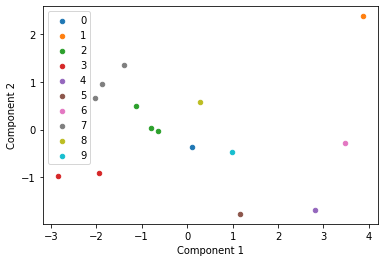

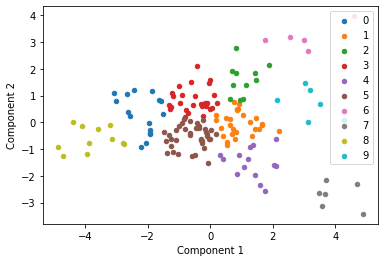

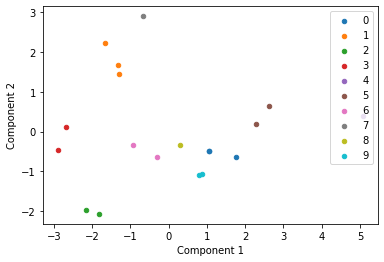

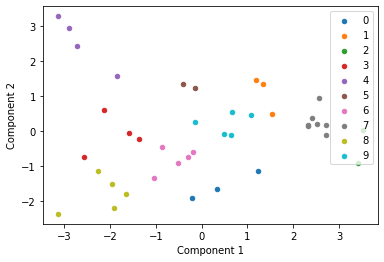

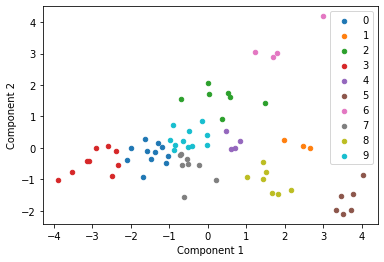

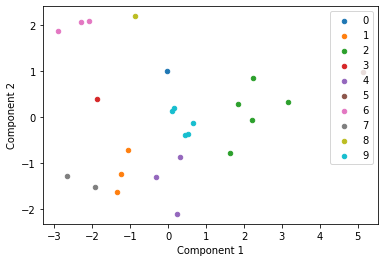

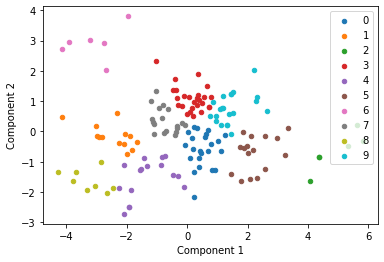

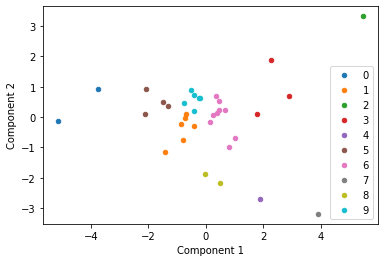

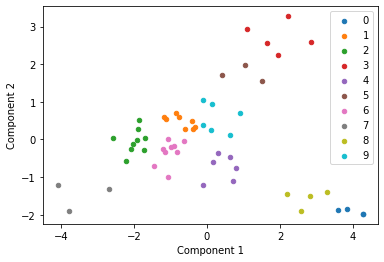

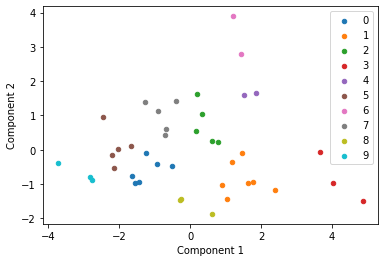

In [45]:
clusters = []
labels = []
for s in l:
    df = s.drop(columns=['index', 'Subj', 'Study', 'Unnamed: 0', 'Unique_ID', 'balance'])

    scaler = preprocessing.StandardScaler().fit(df)
    X_scaled = scaler.transform(df)

    #rename columns to clearly represent decks
    sd = pd.DataFrame(X_scaled, columns=['Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'tot_win', 'tot_los', 'Payoff'])
    sd

    pca = PCA(2)
    df = pca.fit_transform(sd)

    #w_out = pd.DataFrame(df, columns=['Component_1', 'Component_2'])
    w_out_payoff = sd.drop(columns=["Payoff"])

    w_out = pca.fit_transform(w_out_payoff)

    kmeans = KMeans(n_clusters= 10)
 
    #predict the labels of clusters.
    label = kmeans.fit_predict(w_out)
    for v in label:
        labels.append(v)
 
    #Getting unique labels
    u_labels = np.unique(label)

    centroids = kmeans.cluster_centers_
    clusters.append(centroids)
    
    #plotting the results:
    for i in u_labels:
        plt.scatter(w_out[label == i , 0] , w_out[label == i , 1] , label = i, s=20)
    plt.legend()
    #plt.title()
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

In [44]:

arr = np.vstack(clusters)
arr


array([[-1.76473675,  0.99892173],
       [ 0.99350317, -0.47261296],
       [ 3.46516136, -0.27257876],
       [-2.39601401, -0.94249559],
       [ 3.8602803 ,  2.38380133],
       [-0.86166273,  0.16879583],
       [ 1.15593753, -1.77194959],
       [ 0.28497962,  0.58348371],
       [ 0.09501842, -0.37269636],
       [ 2.81634606, -1.69560888],
       [-3.76183592, -0.61634369],
       [-0.59852474, -0.51423171],
       [ 3.06744109,  0.56768576],
       [ 3.32004383,  3.22989166],
       [ 3.99878289, -2.71557598],
       [-0.40849639,  0.88991497],
       [-2.04330527,  0.35879481],
       [ 1.26684153, -1.47253389],
       [ 1.19460962,  1.99664508],
       [ 0.88751085,  0.07778744],
       [-2.78712538, -0.18289869],
       [ 0.28686504, -0.33035353],
       [-1.42682501,  1.78067004],
       [ 5.06767942,  0.39042343],
       [ 2.45493177,  0.4161832 ],
       [-1.9962701 , -2.01753213],
       [-0.67598094,  2.8936892 ],
       [ 1.28299535, -0.52938165],
       [-0.6199613 ,

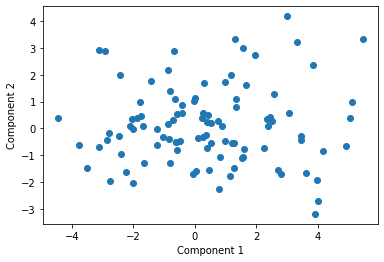

In [53]:

plt.scatter(arr[:,0], arr[:,1])
#plt.legend()
#plt.title()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

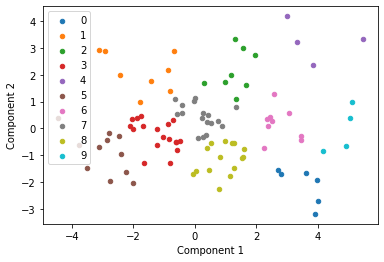

In [52]:
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(arr)
 
#Getting unique labels
u_labels = np.unique(label)

    
#plotting the results:
for i in u_labels:
    plt.scatter(arr[label == i , 0] , arr[label == i , 1] , label = i, s=20)
plt.legend()
#plt.title()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
 